## Understanding Uncertainty in Model Forecasts of Tropical Cyclones


Authors:
* Lara Tobias-Tarsh (laratt@umich.edu)
* Nick Dewhirst
* Ryan Pohlman
* Claire Sheeren

In [1]:
# perform imports
import numpy as np
import sys

# ensure that the path is always set to the correct location for the track error module
sys.path.insert(0, '/Users/laratobias-tarsh/Documents/clim323-final/errorCalcModules/')

import track_error as te # the name you use to import this is arbitrary, I just used te bc it is an easy shorthand
from pprint import pprint
import os

## Motivation
Tropical Cyclones are some of the largest and most destructive natural phenomena to occur on the planet. These warm core storms form in the tropics (30-0 degrees N & S), driven by the relatively warm sea surface temperatures adn more dominant vertical motions in dynamics. (expand)

### Numerical Weather Prediction (NWP)

### Project Goals



### Data
#### TC Best Tracks
Best Track data is gathered from the NHC HurDat2 database (Landsea et. al, 200x), which conatins storm tracks for all Atlantic Basin TCs from 1951 to present, and is updated at the end of each season. Data is stored in a .txt file, contaning all necessary data for calculating model errors. Because the dataset is very large and some datapoints are encoded, we use the hurdat2parser.py library to save time writing a custom parser. The data quality is good, with no missing values in the data for the 2020 Atlantic Hurricane Season. Because the 2020 season was so active that greek letter storm names had to be used alongside the regular alphabetical namelist, we did encounter a limitation of this library, as it uses only the first letter of the storm name to extract data for a given storm. This was resolved by encoding the unique storm identifier codes into our parser function. 

#### Model Forecasts

### DATA CLASSES

#### Reading in data
Data for this study was stored in custom data classes, allowing us to perform calculations efficiently on as many storms as we wanted without requiring us to repeat various lines of code or define vast amount of functions in the main notebook that would clutter our analysis. This allows us to initialise all necessary data for a TC from just the filepath to a folder containing the csv files for the track. Given that some longer lived TCs have a large number of TIGGE track data files, this approach streamlines reading in data to a simple class constructor.

For example, here we load the data for TC Laura. We call the initialiser function from the trackError module, and pass it the filepath to the TIGGE data. This function iterates through each file in the directory and calls another function which is built to extract and parse data for a specific storm. Documentation for these helper functions can be accessed either on the github at https://github.com/larantt/hurricane-verification or by calling the help() function on any of the helper functions:

In [2]:
help(te.generate_cyclone)

Help on function generate_cyclone in module track_error:

generate_cyclone(dirpath)
    Function initialises a cyclone object from a list of csvs
    
    Iterates through a list of csv files in a directory and constructs a
    cyclone object. Generates variables by parsing the name of the file.
    Requires following modified TropCy naming conventions. 
    Each TC's csv files should be contained in its own directory:
    e.g. ~/cyclones/Isaac-2006/
    
    Parameters
    ----------
        dirpath : str
            path to directory containing cyclone csvs
    
    Returns
    -------
         : Cyclone
            Cyclone object for storm in directory



As we can see from the docstring, this function will return the data as a 'Cyclone object.' This is the 'superclass' that contains all of the data for a given storm, although it is built on a number of other classes that help maintain format standardisation between different models and best track databases should the study be expanded. It also reduces the chance of returning incorrect files or reading data into the wrong place as all statistics are read in or collected using 'post init' member functions.

In [3]:
help(te.Cyclone)

Help on class Cyclone in module track_error:

class Cyclone(builtins.object)
 |  Cyclone(name: str, year: int, ecmwf: track_error.Model, best_track: track_error.Track) -> None
 |  
 |  Main TC object containing all information wrt a TC
 |  
 |  Class contains all information that is used in tracking TCs for
 |  organisational purposes, as well as key TC information that can
 |  be used as a metric for comparison.
 |  
 |  Attributes
 |  ----------
 |      name : str 
 |          NHC assigned storm name
 |      year : int
 |          Year of storm occurrence
 |      ecmwf : Model 
 |          ECMWF model object
 |      gfs : Model 
 |          GFS model object
 |      number : int 
 |          Number of storm in season
 |      formation_date : dt.datetime
 |          Date of formation in best track
 |      best_track : List
 |          List containing best track data
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __init__(self, name: str

Here we will initialise Cyclone objects for our case study storms - Cristobal, Laura and Delta:

In [4]:
# Specify path to directory containing subdirectories with TCs:
dirpath = '/Users/laratobias-tarsh/Documents/clim323-final/tcTracksCleaned/'

# Create a list of storms to be analysed
# note - this approach will be conditional on directory structure as you are creating a filepath
storms = ['Cristobal','Laura','Delta']

# Create an empty list to store each cyclone object 
# (I prefer this to a dictionary for a small number of storms, but may be less appropriate for a whole season where individual storms are needed)
storm_list = []

# Loop over file paths and initialise each storm:
for storm in storms:
    storm_list.append(te.generate_cyclone(dirpath+storm))

Cristobal = storm_list[0]
Laura = storm_list[1]
Delta = storm_list[2]

reading file: Cristobal-2020-06-03-00.csv
reading file: Cristobal-2020-06-03-12.csv
reading file: Cristobal-2020-06-04-00.csv
reading file: Cristobal-2020-06-04-12.csv
reading file: Cristobal-2020-06-05-00.csv
reading file: Cristobal-2020-06-05-12.csv
reading file: Cristobal-2020-06-06-00.csv
reading file: Cristobal-2020-06-06-12.csv
reading file: Cristobal-2020-06-07-00.csv
reading file: Cristobal-2020-06-07-12.csv
reading file: Cristobal-2020-06-08-00.csv
reading file: Cristobal-2020-06-08-12.csv
reading file: Cristobal-2020-06-09-00.csv
reading file: Cristobal-2020-06-09-12.csv
reading file: Cristobal-2020-06-10-00.csv
reading file: Cristobal-2020-06-10-12.csv
reading file: Laura-2020-08-22-00.csv
reading file: Laura-2020-08-22-12.csv
reading file: Laura-2020-08-23-00.csv
reading file: Laura-2020-08-23-12.csv
reading file: Laura-2020-08-24-00.csv
reading file: Laura-2020-08-24-12.csv
reading file: Laura-2020-08-25-00.csv
reading file: Laura-2020-08-25-12.csv
reading file: Laura-2020

In [5]:
Cristobal


        Cyclone(
            Name: Cristobal
            Year: 2020
            Formation Date: 2020-06-01
            Dissipation Date: 2020-06-12
            EPS Runs: 16 runs initialised:
                        Forecast(time=Timestamp('2020-06-03 00:00:00'), lat=18.9, lon=-92.3, mslp=1000, vmax=32, track_error=23.791989907819147, intensity_error=4)
                        ...
                        Forecast(time=Timestamp('2020-06-11 12:00:00'), lat=53.4, lon=-79.8, mslp=985, vmax=35, track_error=45.654218883909714, intensity_error=-2)
            Best Track: 
                        Position(time=datetime.datetime(2020, 6, 1, 18, 0), lat=19.4, lon=-90.9, mslp=1006, vmax=25)
                        ...
                        Position(time=datetime.datetime(2020, 6, 12, 6, 0), lat=52.5, lon=-79.1, mslp=998, vmax=35)
        )

Here we can see Cristobal's Cyclone object. This contains some basic statistics for the the overall storm, as well as subclasses for the TC's EPS runs and best track data. There are also various methods included in the class for generating maps of the TC's track. This provides the user with a visual reference for the statistical plots generated later in this notebook. Future iterations of the track_error module will likely implement these as class methods in order to maintain an object oriented style throughout.

For example:

In [6]:
# Print a quick summary of TC Cristobal:
Cristobal.print_summary()

Tropical Cyclone Cristobal:
formation date: 2020-06-01, 18:00
dissipation date: 2020-06-12, 06:00
Best Track: [(-90.9, 19.4), (-91.6, 19.6), (-92.1, 19.6), (-92.5, 19.5), (-92.6, 19.2), (-92.5, 19.0), (-92.3, 18.9), (-92.2, 18.8), (-92.1, 18.7), (-91.9, 18.5), (-91.7, 18.2), (-91.5, 17.9), (-91.2, 17.7), (-90.8, 17.6), (-90.4, 17.9), (-90.1, 18.6), (-89.9, 19.6), (-89.9, 20.8), (-90.0, 22.0), (-90.1, 23.0), (-90.2, 23.9), (-90.2, 24.8), (-90.1, 25.8), (-90.0, 26.9), (-89.9, 28.0), (-89.8, 29.0), (-89.8, 29.3), (-89.9, 29.8), (-90.6, 30.6), (-91.5, 31.7), (-92.0, 32.9), (-92.1, 34.2), (-92.2, 35.8), (-92.1, 38.0), (-91.7, 40.3), (-90.8, 42.6), (-89.3, 45.0), (-87.4, 47.5), (-85.1, 49.8), (-82.6, 51.7), (-81.2, 52.7), (-80.4, 53.2), (-79.8, 53.4), (-79.4, 53.3), (-79.1, 52.5)]
ECMWF Mean Total Track Error: 103.3260505822758
ECMWF Mean Total Intensity Error: 1.3234592054365073


In [7]:
# Display a preview of the source code for the forecast evolution
te.Cyclone.track_map_fcast_evolution??

Signature: te.Cyclone.track_map_fcast_evolution(self)
Source:   
    def track_map_fcast_evolution(self):
        """ Creates a map showing the track forecast evolution across
            model runs """
        fig = plt.figure(figsize=(10,8))
        ax = plt.axes(projection=ccrs.PlateCarree())
        min_lon = min(self.ecmwf.runs[0].return_lons())
        max_lon = max(self.ecmwf.runs[0].return_lons())
        min_lat = min(self.ecmwf.runs[0].return_lats())
        max_lat = max(self.ecmwf.runs[0].return_lats())
        
        for (idx,run) in enumerate(self.ecmwf.runs):
            lons = run.return_lons()
            lats = run.return_lats()
            init = min(run.return_times())

            if min(lons) < min_lon : min_lon = min(lons)
            if max(lons) < max_lon : max_lon = max(lons)
            if min(lats) < min_lat : min_lon = min(lats)
            if max(lats) < max_lat : min_lat = min(lats)

            ax.scatter(lons,lats,transform=ccrs.PlateCarree(), 
      

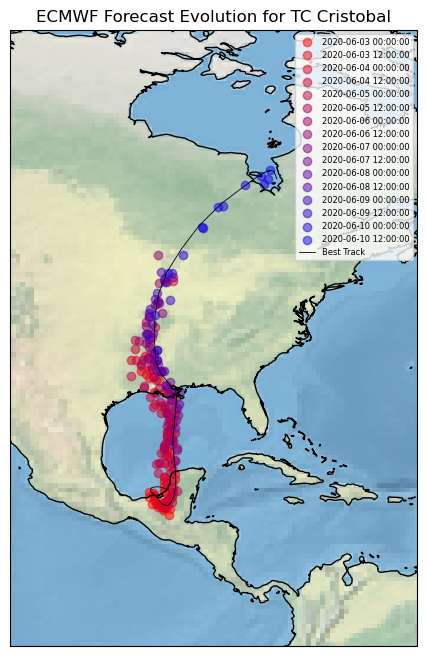

In [8]:
# Generate a forecast evolution map of all EPS runs for TC Cristobal
Cristobal.track_map_fcast_evolution()

In [9]:
# Display source code and documentation for error maps for TC Cristobal
te.Cyclone.track_map_fcast_evolution_errors??

Signature: te.Cyclone.track_map_fcast_evolution_errors(self)
Source:   
    def track_map_fcast_evolution_errors(self):
        """ Creates a map showing the track forecast evolution across
            model runs """
        fig = plt.figure(figsize=(20,10))
        ax1 = fig.add_subplot(211,projection=ccrs.PlateCarree())
        ax2 = fig.add_subplot(221,projection=ccrs.PlateCarree())
        min_lon = min(self.ecmwf.runs[0].return_lons())
        max_lon = max(self.ecmwf.runs[0].return_lons())
        min_lat = min(self.ecmwf.runs[0].return_lats())
        max_lat = max(self.ecmwf.runs[0].return_lats())
        
        for (idx,run) in enumerate(self.ecmwf.runs):
            lons = run.return_lons()
            lats = run.return_lats()
            init = min(run.return_times())

            if min(lons) < min_lon : min_lon = min(lons)
            if max(lons) < max_lon : max_lon = max(lons)
            if min(lats) < min_lat : min_lon = min(lats)
            if max(lats) < max_lat :

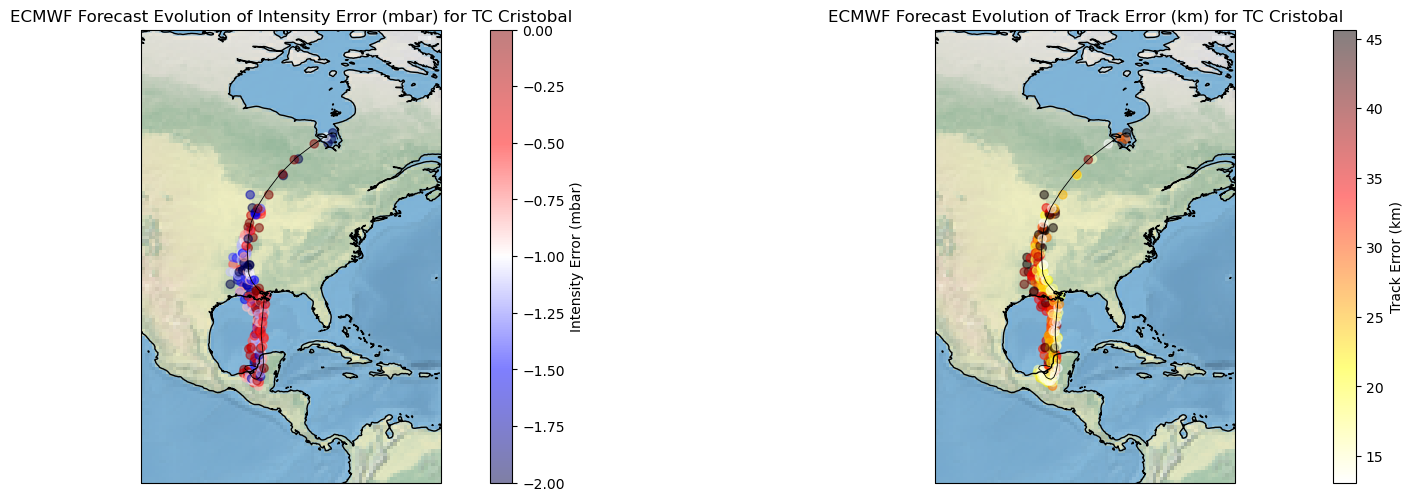

In [15]:
# Show error metric maps for TC Cristobal
Cristobal.track_map_fcast_evolution_errors()

While these maps do not provide an indication of statistical significance, they are helpful for identifying initial trends and verifying analytical results. For example, we can quickly determine that Cristobal was very well forecast, with very small intensity and track error throughout. We also see much more variability in the tropics than in the midlatitudes in both the track and intensity errors, which we discuss further later. 

Returning to dataclasss structure, both the Best Track and the EPS runs that each Cyclone contains is just a list of Forecasts or Positions. A Position is the base class of the hierarchy, and contains all the necessary data to perform analysis on a TC, as well as some member functions that allow us to calculate error metrics as the storm is initialised, saving time and cleaning up the analysis process. A Forecast object inherits the base class attributes, but also stores track and intensity error data for each timestep. This data is calculated using the trackError() and intensityError() methods.

Given that every object is a combination of lists and tuples, it is possible to dot index into the dataframe to extract the desired data.

For reference, the documentation and source code for these is included below:

In [11]:
help(te.Position)

Help on class Position in module track_error:

class Position(builtins.object)
 |  Position(time: datetime.datetime, lat: float, lon: float, mslp: float, vmax: float) -> None
 |  
 |  TC object containing positional and intensity information
 |  
 |  Base class containing all positional and intensity information for a given forecast hour.
 |  Valid for best tracks and forecast objects.
 |  
 |  Attributes
 |  -----------
 |      time : dt.datetime
 |          UTC time associated with forecast member.
 |      lat : float
 |          Latitude of TC centre
 |      lon : float
 |          Longitude of TC centre
 |      mslp : float
 |          Mean Sea Level Pressure at TC centre
 |      vmax : float
 |          Maximum sustained windspeed
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __init__(self, time: datetime.datetime, lat: float, lon: float, mslp: float, vmax: float) -> None
 |      Initialize self.  See help(type(self)) for accurate

In [12]:
# show source code for intensity error function
te.Position.intensityError??

Signature: te.Position.intensityError(self, other)
Source:   
    def intensityError(self, other):
        """Calculates intensity difference between two TCs

        Calculates the difference in intensity between the mean sea level pressure (MSLP) 
        at one TC centre and another TC centre.
        Generally used for calculating the intensity error between a modelled TC
        and the TC best track but can be useful for analysing other parameters when
        TC interaction is an important factor therefore is included as an attr.

        Parameters
        ----------
        self : Position
            Existing position object containing central MSLP in mbar
        other : Position
            Position object containing central MSLP in mbar

        Returns
        -------
         : float
            difference in central MSLP between the two systems
        
        """
        #real_mslp = [entry for (index,entry) in enumerate(other) if other[index].time == self.time][0]
  

In [13]:
# show source code for track error function
te.Position.trackError??

Signature: te.Position.trackError(self, other)
Source:   
    def trackError(self,other):
        """ Calculates a TC track error between one storm and another
        
        Performs a time based indexing scheme then calculates great circle distance
        between two tracks. 

        Parameters
        ----------
        self : Position
            Existing Position object containing latitude and longitude information
        other : Position
            Position object containing latitude and longitude information

        Returns
        --------
         : float
            Track error distance between two Position objects
        """
        # check start time of position object
        #real_position = [entry for (index,entry) in enumerate(other) if other[index].time == self.time][0]
        return self.great_circle(other)
File:      ~/Documents/clim323-final/errorCalcModules/track_error.py
Type:      function

The class that contains the majority of data useful in analysis is the Track class. This is essentially a time series of Positions or Forecasts stored in a list. Each track can be considered equivalent to one run of the model, thus each Track for a storm is stored in the Run object. Because the module was constructed with the intention of comparing multiple ensemble members of multiple models, the Model class is somewhat redundant in this analysis, however for completeness and future development following the class, this was kept in.


Here we examine the initial EPS forecast for Cristobal:

In [18]:
# Index in to Cristobal cyclone object and store the initial EPS forecast
run1 = Cristobal.ecmwf.runs[0]

# Pretty print the forecast positions in this object
pprint(run1)

Track(forecasts=[Forecast(time=Timestamp('2020-06-03 00:00:00'),
                          lat=18.9,
                          lon=-92.3,
                          mslp=1000,
                          vmax=32,
                          track_error=23.791989907819147,
                          intensity_error=4),
                 Forecast(time=Timestamp('2020-06-09 00:00:00'),
                          lat=32.1,
                          lon=-92.7,
                          mslp=997,
                          vmax=25,
                          track_error=240.09571266696568,
                          intensity_error=3),
                 Forecast(time=Timestamp('2020-06-08 18:00:00'),
                          lat=31.2,
                          lon=-92.7,
                          mslp=998,
                          vmax=36,
                          track_error=200.21136768278873,
                          intensity_error=4),
                 Forecast(time=Timestamp('2020-06-08 00:00:0

Note that these are not in chronological order, which we address later in the code when performing analysis. However, we can see the structure of the Track object clearly. We also calculate the mean track and intensity error for each run and store these in the Track object.

The Track object also has useful functionality for analysis, allowing for the track error, intensity error, times and coordinates to be returned as lists that can be plotted and analysed easily. All of these are constructed using the same simple list comprehension structure, thus only source code for one of these functions is included here. All code is included in the module on GitHub. 

Here we print the coordinates and track error for the initial run of Cristobal:

In [22]:
te.Track.return_coords??

Signature: te.Track.return_coords(self)
Source:   
    def return_coords(self):
        """ Gives a list of (lat,lon) pairs for a given track
        
        Parameters
        -----------
        self : Track
            track object containing positional and temporal TC data

        Returns
        --------
            : List
            List of tuples containing coordinates of TC position for easy mapping
        """
        return [(self.forecasts[idx].lon,self.forecasts[idx].lat) for (idx,fcst) in enumerate(self.forecasts)]
File:      ~/Documents/clim323-final/errorCalcModules/track_error.py
Type:      function

In [23]:
run1.return_coords()

[(-92.3, 18.9),
 (-92.7, 32.1),
 (-92.7, 31.2),
 (-91.1, 28.3),
 (-91.7, 30.9),
 (-90.2, 26.5),
 (-92.7, 19.0),
 (-92.8, 18.5),
 (-92.4, 17.8),
 (-91.8, 17.5),
 (-91.3, 17.1),
 (-90.6, 16.6),
 (-90.5, 17.2),
 (-90.5, 18.3),
 (-91.2, 19.0),
 (-91.1, 19.2),
 (-91.2, 19.7),
 (-91.2, 20.2),
 (-91.0, 20.7),
 (-90.6, 21.8),
 (-90.3, 24.9)]

In [24]:
run1.return_TE()

[23.791989907819147,
 240.09571266696568,
 200.21136768278873,
 203.53061418160505,
 90.96281839326736,
 48.71356496307478,
 43.512127220517385,
 71.47541501896396,
 94.07230004376072,
 78.5527640307618,
 91.44944627744982,
 137.9303236381213,
 54.695163232883914,
 45.716500027037895,
 124.03722245221923,
 133.4853773495594,
 182.6263202951232,
 235.70240768159283,
 272.09061811294885,
 237.07868784433506,
 102.07345942286595]

### Track Error
Ryan's bit

In [14]:
# show source code for great circle distance function
te.Position.great_circle??

Signature: te.Position.great_circle(self, other)
Source:   
    def great_circle(self, other):
        """ Calculates great circle distance between two points using the haversine formula
        
        Generally used to calculate the track error, but useful to have as an attribute as
        this can be used to calculate distances between storms and so could be helful
        for investigating other TC interactions such as the Fujiwhara effect.
        
        Parameters
        ----------
        self : Position
            Existing Position object containing latitude and longitude information
        other : Position
            Position object containing latitude and longitude information

        Returns
        --------
        gcd : float
            Great circle distance between two Position objects in km

        """
        radius = 6371  # Earth radius in kilometers
        lam_1, lam_2 = radians(self.lon), radians(other.lon)
        phi_1, phi_2 = radians(self.lat), radia

### ANALYSIS
Nick / Claire

#### Discussion

Lara (will fill out when FFTs are in the file)

In [25]:
def get_TCs(dir):
    """ Sort and list all directories containing TC tracks
    
    Lists all directories containing TC tracks in a specified path.
    Ignores all hidden directories and other files.


    Parameters
    -----------
    dir : string
        Path to directory containing TC track directories

    Returns
    --------
        : List
        List of directories containing TC tracks
    """
    return sorted((f for f in os.listdir(dir) if not f.startswith(".")), key=str.lower)

In [26]:
# Read in all cyclones for the season
dirpath = "/Users/laratobias-tarsh/Documents/clim323-final/tcTracksCleaned/"
storms = get_TCs(dirpath)

# Store storms for all season in list
storm_list = []
for storm in storms:
    # Initialise Cyclone objects for all storms in season
    storm_list.append(te.generate_cyclone(dirpath+storm))

reading file: Arthur-2020-05-17-12.csv
reading file: Arthur-2020-05-18-00.csv
reading file: Arthur-2020-05-18-12.csv
reading file: Arthur-2020-05-19-00.csv
reading file: Arthur-2020-05-19-12.csv
reading file: Arthur-2020-05-20-00.csv
reading file: Beta-2020-09-19-00.csv
reading file: Beta-2020-09-19-12.csv
reading file: Beta-2020-09-20-00.csv
reading file: Beta-2020-09-22-00.csv
reading file: Beta-2020-09-22-12.csv
reading file: Beta-2020-09-23-00.csv
reading file: Beta-2020-09-23-12.csv
reading file: Beta-2020-09-24-00.csv
reading file: Beta-2020-09-24-12.csv
reading file: Cristobal-2020-06-03-00.csv
reading file: Cristobal-2020-06-03-12.csv
reading file: Cristobal-2020-06-04-00.csv
reading file: Cristobal-2020-06-04-12.csv
reading file: Cristobal-2020-06-05-00.csv
reading file: Cristobal-2020-06-05-12.csv
reading file: Cristobal-2020-06-06-00.csv
reading file: Cristobal-2020-06-06-12.csv
reading file: Cristobal-2020-06-07-00.csv
reading file: Cristobal-2020-06-07-12.csv
reading file:

In [27]:
def track_intensity_corr(RunNumber, ax1, cyclone):
    ''' Extracts time indexed and organised position and intensity data for a TC
    
    Parameters
    -----------
    RunNumber : int
        Number of track based off lead time from dissipation

    ax1 : mpl.axes
        Axis to plot on

    cyclone : Cyclone
        Cyclone object for given TC

    Returns
    --------
    IntensityError : np.array
        Numpy array of intensity error for a given storm in time indexed order

    TrackError : np.array
        Numpy array of track error for a given storm in time indexed order
    '''

    #All the model output variables in a big list of tuples.
    Output = cyclone.ecmwf.runs[RunNumber].forecasts

    #Get the times and track errors out of the list.
    RawT = [cyclone.ecmwf.runs[RunNumber].forecasts[idx].time for (idx, fcst) in enumerate(cyclone.ecmwf.runs[RunNumber].forecasts)]
    RawTE = [cyclone.ecmwf.runs[RunNumber].forecasts[idx].track_error for (idx, fcst) in enumerate(cyclone.ecmwf.runs[RunNumber].forecasts)]
    
    #Create a list of tuples with the times and track errors.
    TTE = merge(RawT, RawTE)
    
    #Sort the tuples in chronological order to plot them correctly.
    SortedTTE = sorted(TTE, key = lambda x: x[0])
    
    #Empty lists to append the times and track errors into from the list of tuples.
    TimeList = []
    TrackErrorList = []
    for i in SortedTTE:
        TimeList.append(i[0])
        TrackErrorList.append(i[1])
    
    TrackError = np.array(TrackErrorList)

    #Get the times and track errors out of the list.
    RawT = [cyclone.ecmwf.runs[RunNumber].forecasts[idx].time for (idx, fcst) in enumerate(cyclone.ecmwf.runs[RunNumber].forecasts)]
    RawIE = [cyclone.ecmwf.runs[RunNumber].forecasts[idx].intensity_error for (idx, fcst) in enumerate(cyclone.ecmwf.runs[RunNumber].forecasts)]
    
    #Create a list of tuples with the times and track errors.
    TIE = merge(RawT, RawIE)
    
    #Sort the tuples in chronological order to plot them correctly.
    SortedTIE = sorted(TIE, key = lambda x: x[0])
    
    #Empty lists to append the times and track errors into from the list of tuples.
    TimeList = []
    IntensityErrorList = []
    for i in SortedTIE:
        TimeList.append(i[0])
        IntensityErrorList.append(i[1])
    
    IntensityError = np.array(IntensityErrorList)


    Time = np.array(TimeList)
    #First set of axes for track error vs. time on first subplot.
    ax1.scatter(IntensityError, TrackError, c = te.colorFader('red', 'blue'))
    ax1.set_xlabel('Intensity Error (hPa)')
    ax1.set_ylabel('Track Error (km)')
    #ax1.set_title(f'Track Error vs Intensity Error for each EPS Mean Run of TC {cyclone.name}')


    return IntensityError, TrackError

In [28]:
def te_tracks_plotter(cyclone,ax1,fig1):
    """ Plotting function for comparative intensity and track error data
    
    Parameters
    -----------
    cyclone : Cyclone
        Cyclone object containing data for TC

    ax1 : mpl.axes
        Axes to plot on

    fig1 : mpl.figure
        Figure to plot on

    """
    # Make list of run numbers and iterate through to gather entire season
    RunNumber = range(len(cyclone.ecmwf.runs))
    for i in RunNumber:
        cf = i/len(RunNumber)
        # extract track error and intensity error data
        label, tes = track_intensity_corr(i, ax1,cyclone)
    fig1.suptitle(f'Track Error vs Intensity Error for 2020',fontsize=20)
    fig1.tight_layout() 